<a href="https://colab.research.google.com/github/ArtieFalcon/Spark_collab/blob/main/Practice_Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BASICS (Stepik)

In [2]:
!pip install pyspark==3.0.1 py4j==0.10.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 MB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 23.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612229 sha256=4d8c747a3507d75881618c7070bb62dd525b25ca3e84d559221276f2315bba3f
  Stored in directory: /root/.cache/pip/wheels/19/b0/c8/6cb894117070e130fc44352c2a13f15b6c27e440d04a84fb48
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

In [ ]:
csv_file = '/content/sample_data/california_housing_train.csv'
df = spark.read.csv(csv_file)
#df.head(4)
df.show()

+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|        _c0|      _c1|               _c2|        _c3|           _c4|        _c5|        _c6|          _c7|               _c8|
+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population| households|median_income|median_house_value|
|-114.310000|34.190000|         15.000000|5612.000000|   1283.000000|1015.000000| 472.000000|     1.493600|      66900.000000|
|-114.470000|34.400000|         19.000000|7650.000000|   1901.000000|1129.000000| 463.000000|     1.820000|      80100.000000|
|-114.560000|33.690000|         17.000000| 720.000000|    174.000000| 333.000000| 117.000000|     1.650900|      85700.000000|
|-114.570000|33.640000|         14.000000|1501.000000|    337.000000| 515.000000| 226.000000|     3.191700|    

In [ ]:
from pyspark.sql import SparkSession
#SparkSession — way of initialization for basic PySpark functionality PySpark for creation of PySpark RDD, DataFrame and Dataset.
#SparkSession internally creates SparkConfig and SparkContext
spark = (SparkSession.builder
.master("local[*]")
.appName('PySpark_Tutorial')
.getOrCreate()
)

dept = [("Finance",10), 
        ("Marketing",20), 
        ("Sales",30), 
        ("IT",40) 
      ]
deptColumns = ["dept_name","dept_id"]
deptDF = spark.createDataFrame(data=dept, schema = deptColumns)
deptDF.printSchema() 
deptDF.show(truncate=False) # display
deptDF.write.csv('dataset.csv')

root
 |-- dept_name: string (nullable = true)
 |-- dept_id: long (nullable = true)

+---------+-------+
|dept_name|dept_id|
+---------+-------+
|Finance  |10     |
|Marketing|20     |
|Sales    |30     |
|IT       |40     |
+---------+-------+



In [5]:
k = spark.read.csv('/content/stocks_price_final.csv', header='True', sep=',')
k.printSchema() # like describe

root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [ ]:
from pyspark.sql.types import *
# like cast()
data_schema = [
               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('date', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields = data_schema)
data = spark.read.csv(
    '/content/sample_data/stocks_price_final.csv',
    sep=',',
    header=True,
    schema=final_struc 
)

data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [7]:
from pyspark.sql.types import *
data_schema = [
               StructField('_c0', IntegerType(), nullable=True),
               StructField('symbol', StringType(), True),
               StructField('date', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields = data_schema)

data1 = spark.read.csv('/content/sample_data/stocks_price_final.csv', sep=',', header=True, schema=final_struc).withColumnRenamed('market.cap','market_cap')

In [9]:
data1.count()

228027

In [13]:
data2 = data1.withColumnRenamed('market.cap', 'mcap')

In [14]:
# Удаление строк с пропущенными значениями
data2_no_na = data2.na.drop()

In [15]:
data1.count() - data2_no_na.count()

831

In [ ]:
k = spark.read.csv('/content/sample_data/stocks_price_final.csv',header = 'True', sep=',')
k.dtypes #data column types

[('_c0', 'string'),
 ('symbol', 'string'),
 ('date', 'string'),
 ('open', 'string'),
 ('high', 'string'),
 ('low', 'string'),
 ('close', 'string'),
 ('volume', 'string'),
 ('adjusted', 'string'),
 ('market.cap', 'string'),
 ('sector', 'string'),
 ('industry', 'string'),
 ('exchange', 'string')]

In [ ]:
k.show(6) # ilike limit

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|       56|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [ ]:
k.head(3) #returns rows as list

[Row(_c0='1', symbol='TXG', date='2019-09-12', open='54', high='58', low='51', close='52.75', volume='7326300', adjusted='52.75', market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0='2', symbol='TXG', date='2019-09-13', open='52.75', high='54.355', low='49.150002', close='52.27', volume='1025200', adjusted='52.27', market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0='3', symbol='TXG', date='2019-09-16', open='52.450001', high='56', low='52.009998', close='55.200001', volume='269900', adjusted='55.200001', market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')]

In [ ]:
k.first() # rerturns first row

Row(_c0='1', symbol='TXG', date='2019-09-12', open='54', high='58', low='51', close='52.75', volume='7326300', adjusted='52.75', market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')

In [ ]:
k.take(3) # returns rows as list (similar to k.head(3))

[Row(_c0='1', symbol='TXG', date='2019-09-12', open='54', high='58', low='51', close='52.75', volume='7326300', adjusted='52.75', market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0='2', symbol='TXG', date='2019-09-13', open='52.75', high='54.355', low='49.150002', close='52.27', volume='1025200', adjusted='52.27', market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0='3', symbol='TXG', date='2019-09-16', open='52.450001', high='56', low='52.009998', close='55.200001', volume='269900', adjusted='55.200001', market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')]

In [ ]:
from pyspark.sql.types import *
# like cast()
data_schema = [
               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('date', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields = data_schema)
datak = spark.read.csv(
    '/content/sample_data/stocks_price_final.csv',
    sep=',',
    header=True,
    schema=final_struc 
)
#datak.printSchema()
datak.describe() #statistics for numerics like info in pd

DataFrame[summary: string, _c0: string, symbol: string, open: string, high: string, low: string, close: string, volume: string, adjusted: string, market.cap: string, sector: string, industry: string, exchange: string]

In [ ]:
k.columns #returns column names as list

['_c0',
 'symbol',
 'date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market.cap',
 'sector',
 'industry',
 'exchange']

In [ ]:
k = spark.read.csv('/content/sample_data/stocks_price_final.csv', header='True', sep=',')
k.count() #returns count of all rows in dataset

2261246

In [ ]:
k.distinct().count() # ! cnt of distinct rows in dataset

1729101

In [ ]:
dd = spark.read.csv('/content/sample_data/stocks_price_final.csv', header='True', sep=',')
dd = dd.withColumn('new_date_column', dd.date) # add new columns as copy of column called "data"
dd.show(3)

+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+---------------+
|_c0|symbol|      date|     open|  high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|new_date_column|
+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+---------------+
|  1|   TXG|2019-09-12|       54|    58|       51|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|     2019-09-12|
|  2|   TXG|2019-09-13|    52.75|54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|     2019-09-13|
|  3|   TXG|2019-09-16|52.450001|    56|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|     2019-09-16|
+---+------+----------+---------+------+---------+---------+-------+---------+----------+-----------

In [ ]:
dd = dd.withColumnRenamed('new_date_column', 'date_changed') #rename column
dd.show(3)

+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|_c0|symbol|      date|     open|  high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|date_changed|
+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|  1|   TXG|2019-09-12|       54|    58|       51|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-12|
|  2|   TXG|2019-09-13|    52.75|54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-13|
|  3|   TXG|2019-09-16|52.450001|    56|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-16|
+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+---------------

In [ ]:
dd = dd.drop('date_changed') #delete column
dd.show(3)

+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|  high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|       54|    58|       51|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|    56|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
only showing top 3 rows



In [ ]:
dz = spark.read.csv('/content/sample_data/stocks_price_final.csv', header='True', sep=',')

In [ ]:
#dz = dd.withColumn('new_volume', dd.volume ) 
dz = dz.drop('exchange')
#symbol, close, volume , adjusted, market.cap, exchange
dz.show(3)

+---+----------+---------+------+---------+-------------+--------------------+----------+
|_c0|      date|     open|  high|      low|       sector|            industry|new_volume|
+---+----------+---------+------+---------+-------------+--------------------+----------+
|  1|2019-09-12|       54|    58|       51|Capital Goods|Biotechnology: La...|   7326300|
|  2|2019-09-13|    52.75|54.355|49.150002|Capital Goods|Biotechnology: La...|   1025200|
|  3|2019-09-16|52.450001|    56|52.009998|Capital Goods|Biotechnology: La...|    269900|
+---+----------+---------+------+---------+-------------+--------------------+----------+
only showing top 3 rows



In [ ]:
dz = dz.withColumnRenamed('high1', 'high')
dz.show(3)

+---+----------+---------+------+---------+-------------+--------------------+----------+
|_c0|      date|     open|   low|     high|       sector|            industry|new_volume|
+---+----------+---------+------+---------+-------------+--------------------+----------+
|  1|2019-09-12|       54|    58|       51|Capital Goods|Biotechnology: La...|   7326300|
|  2|2019-09-13|    52.75|54.355|49.150002|Capital Goods|Biotechnology: La...|   1025200|
|  3|2019-09-16|52.450001|    56|52.009998|Capital Goods|Biotechnology: La...|    269900|
+---+----------+---------+------+---------+-------------+--------------------+----------+
only showing top 3 rows



In [ ]:
#dz = dz.withColumn('date1', dz.date) # add new columns as copy of column called "data"
#dz = dz.drop('date')
dz = dz.withColumnRenamed('date1', 'date')
dz.show(3)

+---+---------+------+---------+-------------+--------------------+----------+----------+
|_c0|     open|   low|     high|       sector|            industry|new_volume|      date|
+---+---------+------+---------+-------------+--------------------+----------+----------+
|  1|       54|    58|       51|Capital Goods|Biotechnology: La...|   7326300|2019-09-12|
|  2|    52.75|54.355|49.150002|Capital Goods|Biotechnology: La...|   1025200|2019-09-13|
|  3|52.450001|    56|52.009998|Capital Goods|Biotechnology: La...|    269900|2019-09-16|
+---+---------+------+---------+-------------+--------------------+----------+----------+
only showing top 3 rows



In [ ]:
data_schema = [
               StructField('_c0', IntegerType(), nullable=True),
               StructField('open', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('new_volume', IntegerType(), True),
               StructField('date', DateType(), True)
            ]

final_struc = StructType(fields = data_schema)
#dz = spark.read.csv(df_path, sep=',', header=True, schema=final_struc)

In [ ]:
csv_file = '/content/sample_data/california_housing_train.csv'
df = spark.read.csv(csv_file)
#df.head(4)
df.take(4)

[Row(_c0='longitude', _c1='latitude', _c2='housing_median_age', _c3='total_rooms', _c4='total_bedrooms', _c5='population', _c6='households', _c7='median_income', _c8='median_house_value'),
 Row(_c0='-114.310000', _c1='34.190000', _c2='15.000000', _c3='5612.000000', _c4='1283.000000', _c5='1015.000000', _c6='472.000000', _c7='1.493600', _c8='66900.000000'),
 Row(_c0='-114.470000', _c1='34.400000', _c2='19.000000', _c3='7650.000000', _c4='1901.000000', _c5='1129.000000', _c6='463.000000', _c7='1.820000', _c8='80100.000000'),
 Row(_c0='-114.560000', _c1='33.690000', _c2='17.000000', _c3='720.000000', _c4='174.000000', _c5='333.000000', _c6='117.000000', _c7='1.650900', _c8='85700.000000')]

In [1]:
import pyspark.sql.functions as f

# Удаление строк с пропущенными значениями
data.na.drop()

# Замена отсутствующих значений средним
data.na.fill(data.select(f.mean(data['open'])).collect()[0][0])

# Замена отсутствующих значений новыми
data.na.replace(old_value, new_value)

ModuleNotFoundError: ignored

Operations:
Select
Filter
Between
When
Like
GroupBy
Aggregations


Select

In [21]:
from pyspark.sql.functions import *
k = spark.read.csv('/content/sample_data/stocks_price_final.csv', header='True', sep=',')
# select one column
k.printSchema()
k.select('symbol').show(3)
# select multiple column
k.select(['symbol', 'volume', 'date']).show(5)

root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)

+------+
|symbol|
+------+
|   TXG|
|   TXG|
|   TXG|
+------+
only showing top 3 rows

+------+-------+----------+
|symbol| volume|      date|
+------+-------+----------+
|   TXG|7326300|2019-09-12|
|   TXG|1025200|2019-09-13|
|   TXG| 269900|2019-09-16|
|   TXG| 602800|2019-09-17|
|   TXG|1589600|2019-09-18|
+------+-------+----------+
only showing top 5 rows



Filter
Данный метод фильтрует данные на основе заданного условия. Вы также можете указать несколько условий, используя операторы AND (&), OR (|) и NOT (~). Вот пример получения данных о ценах на акции за январь 2020 года.

In [22]:
k.filter( (col('date') >= lit('2020-01-01')) & (col('date') <= lit('2020-01-31')) ).show(5)

+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close|volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
| 78|   TXG|2020-01-02|76.910004|77.989998|71.480003|72.830002|220200|72.830002|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 79|   TXG|2020-01-03|71.519997|76.188004|70.580002|75.559998|288300|75.559998|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 80|   TXG|2020-01-06|75.269997|77.349998|73.559998|75.550003|220600|75.550003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 81|   TXG|2020-01-07|       76|77.279999|    75.32|75.980003|182400|75.980003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 82|   TXG|2020-01-08|76.089996|76.949997|72.73

Between
Этот метод возвращает True, если проверяемое значение принадлежит указанному отрезку, иначе — False. Давайте посмотрим на пример отбора данных, в которых значения adjusted находятся в диапазоне от 100 до 500.

In [25]:
k.filter(k.adjusted.between(100.0, 500.0)).show(3)

+---+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|      open|      high|       low|     close|volume|  adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
| 93|   TXG|2020-01-24| 95.459999|       101| 94.157997|100.790001|328100|100.790001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 94|   TXG|2020-01-27| 99.760002|104.892998| 97.019997|103.209999|334900|103.209999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 95|   TXG|2020-01-28|104.620003|108.269997|103.297997|106.620003|245400|106.620003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
+---+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
only showing 

When
Он возвращает 0 или 1 в зависимости от заданного условия. В приведенном ниже примере показано, как выбрать такие цены на момент открытия и закрытия торгов, при которых скорректированная цена была больше или равна 200.

In [27]:
k.select('open', 'close', 
            when(k.adjusted >= 200.0, 1).otherwise(0)
).show(5)

+---------+---------+-----------------------------------------------+
|     open|    close|CASE WHEN (adjusted >= 200.0) THEN 1 ELSE 0 END|
+---------+---------+-----------------------------------------------+
|       54|    52.75|                                              0|
|    52.75|    52.27|                                              0|
|52.450001|55.200001|                                              0|
|56.209999|56.779999|                                              0|
|56.849998|       62|                                              0|
+---------+---------+-----------------------------------------------+
only showing top 5 rows



Like
Этот метод похож на оператор Like в SQL. Приведенный ниже код демонстрирует использование rlike() для извлечения имен секторов, которые начинаются с букв M или C.

In [29]:
k.select(
    'sector', 
    k.sector.rlike('^[B,C]').alias('Колонка sector начинается с B или C')
).distinct().show()

k.select('sector',
            data.sector.like("%Heal%")
      ).distinct().show()

+--------------------+-----------------------------------+
|              sector|Колонка sector начинается с B или C|
+--------------------+-----------------------------------+
|         Health Care|                              false|
|       Capital Goods|                               true|
|Consumer Non-Dura...|                               true|
|    Public Utilities|                              false|
|   Consumer Durables|                               true|
|             Finance|                              false|
|      Transportation|                              false|
|       Miscellaneous|                              false|
|   Consumer Services|                               true|
|              Energy|                              false|
|    Basic Industries|                               true|
|          Technology|                              false|
+--------------------+-----------------------------------+



In [34]:
k.filter( k.sector.rlike('^[B,C]') ).select('sector').distinct().show()

+--------------------+
|              sector|
+--------------------+
|Consumer Non-Dura...|
|    Basic Industries|
|       Capital Goods|
|   Consumer Services|
|   Consumer Durables|
+--------------------+



In [38]:
kk = k.select(
    'sector', 
    k.sector.rlike('^[B,C]').alias('startBC')
).distinct()
kkk = kk.filter(kk.startBC == 'true').show()

+--------------------+-------+
|              sector|startBC|
+--------------------+-------+
|       Capital Goods|   true|
|Consumer Non-Dura...|   true|
|   Consumer Durables|   true|
|   Consumer Services|   true|
|    Basic Industries|   true|
+--------------------+-------+



GroupBy
Само название подсказывает, что данная функция группирует данные по выбранному столбцу и выполняет различные операции, такие как вычисление суммы, среднего, минимального, максимального значения и т. д. В приведенном ниже примере объясняется, как получить среднюю цену открытия, закрытия и скорректированную цену акций по отраслям.



In [42]:
(k.select(['industry', 'open', 'close', 'adjusted'])
    .groupBy('industry')
    .mean()
    .show()
)

+--------------------+
|            industry|
+--------------------+
|Finance/Investors...|
|       Miscellaneous|
|Investment Banker...|
|   Food Distributors|
|Miscellaneous man...|
|    Ophthalmic Goods|
|        Broadcasting|
|Agricultural Chem...|
|Biotechnology: Bi...|
|Other Specialty S...|
|Biotechnology: El...|
|Other Consumer Se...|
|Electric Utilitie...|
|     Specialty Foods|
|    Plastic Products|
|Precision Instrum...|
|        Water Supply|
|               Banks|
|Farming/Seeds/Mil...|
|Medical/Nursing S...|
+--------------------+
only showing top 20 rows



In [53]:
k.groupBy('industry').agg(mean('open'),mean('close'),max('adjusted').alias('ma')).show()

+--------------------+------------------+------------------+----------+
|            industry|         avg(open)|        avg(close)|        ma|
+--------------------+------------------+------------------+----------+
|Finance/Investors...| 5.134401785714286| 5.136630739795919|  9.995176|
|   Food Distributors|43.274508569354644| 43.27317810574859|      9.99|
|Investment Banker...| 58.95058094575029|58.983085960826294| 99.973457|
|       Miscellaneous| 16.38588266938776| 16.35987909030613|      9.95|
|Miscellaneous man...|15.660586409948984| 15.65093486096939|      9.99|
|    Ophthalmic Goods|108.50137892138572|108.54045987608258| 64.160004|
|Agricultural Chem...|22.046413928996614|22.042051076318053| 99.943466|
|        Broadcasting|24.916787464825223| 24.91738845539514|        NA|
|Biotechnology: Bi...|24.808083192324542|24.803587149935442|        NA|
|Other Specialty S...| 84.80718810562882| 84.80276550929834|999.549988|
|Biotechnology: El...| 33.36891734535045| 33.33611913546892| 99.

Агрегирование
PySpark предоставляет встроенные стандартные функции агрегации, определенные в API DataFrame, они могут пригодится, когда нам нужно выполнить агрегирование значений ваших столбцов. Другими словами, такие функции работают с группами строк и вычисляют единственное возвращаемое значение для каждой группы.

В приведенном ниже примере показано, как отобразить минимальные, максимальные и средние значения цен открытия, закрытия и скорректированных цен акций в промежутке с января 2019 года по январь 2020 года для каждого сектора.

In [45]:
(k.filter((col('date') >= lit('2019-01-02')) & (col('date') <= lit('2020-01-31')))
    .groupBy("sector")
    .agg(min("date").alias("С"), 
         max("date").alias("По"), 
         
         min("open").alias("Минимум при открытии"),
         max("open").alias("Максимум при открытии"), 
         avg("open").alias("Среднее в open"), 

         min("close").alias("Минимум при закрытии"), 
         max("close").alias("Максимум при закрытии"), 
         avg("close").alias("Среднее в close"), 

         min("adjusted").alias("Скорректированный минимум"), 
         max("adjusted").alias("Скорректированный максимум"), 
         avg("adjusted").alias("Среднее в adjusted"), 

      ).show(truncate=False)
)

+---------------------+----------+----------+--------------------+---------------------+------------------+--------------------+---------------------+------------------+-------------------------+--------------------------+------------------+
|sector               |С         |По        |Минимум при открытии|Максимум при открытии|Среднее в open    |Минимум при закрытии|Максимум при закрытии|Среднее в close   |Скорректированный минимум|Скорректированный максимум|Среднее в adjusted|
+---------------------+----------+----------+--------------------+---------------------+------------------+--------------------+---------------------+------------------+-------------------------+--------------------------+------------------+
|Miscellaneous        |2019-01-02|2020-01-31|0.16                |NA                   |51.51619596530094 |0.16                |NA                   |51.54953412269053 |0.16                     |NA                        |51.21050733851903 |
|Health Care          |2019-01-0

In [56]:
from pyspark.sql.functions import *
bank = spark.read.csv('/content/sample_data/bank.csv', header='True', sep=';')
bank.show(4)

+---+----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
|age|       job|marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
| 30|unemployed|married|  primary|     no|   1787|     no|  no|cellular| 19|  oct|      79|       1|   -1|       0| unknown| no|
| 33|  services|married|secondary|     no|   4789|    yes| yes|cellular| 11|  may|     220|       1|  339|       4| failure| no|
| 35|management| single| tertiary|     no|   1350|    yes|  no|cellular| 16|  apr|     185|       1|  330|       1| failure| no|
| 30|management|married| tertiary|     no|   1476|    yes| yes| unknown|  3|  jun|     199|       4|   -1|       0| unknown| no|
+---+----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+------

Задача
Сгруппировать значения по возрасту и найти количество элементов в группе.
Вывести первые 5 строк

In [60]:
bank.groupBy('age').agg(count('age').alias('count')).show(5)

+---+-----+
|age|count|
+---+-----+
| 51|   91|
| 54|   71|
| 29|   97|
| 69|    6|
| 42|  141|
+---+-----+
only showing top 5 rows



Задача
Найти, сотрудники с каким возрастом работают в банке чаще всего.
Вывести первые 5 строк

In [62]:
b2 = bank.groupBy('age').agg(count('age').alias('counts'))
b3 = b2.sort(b2.counts.desc())
#df.sort(df.department.asc(),df.state.desc())
b3.show(5)

+---+------+
|age|counts|
+---+------+
| 34|   231|
| 32|   224|
| 31|   199|
| 36|   188|
| 33|   186|
+---+------+
only showing top 5 rows



Задача
Необходимо найти возраст и количество самых молодых сотрудников банка
Вывести первые 5 строк,

In [65]:
b2 = bank.groupBy('age').agg(count('age').alias('count'))
b4 = b2.sort(b2.age.asc())
b4.show(5)

+---+-----+
|age|count|
+---+-----+
| 19|    4|
| 20|    3|
| 21|    7|
| 22|    9|
| 23|   20|
+---+-----+
only showing top 5 rows



Задача
Необходимо вывести возраст и количество сотрудников, которым более 30 лет. Произвести сортировку полученной таблицы по столбцу age по возрастанию.
Вывести первые 5 строк

In [69]:
#k.filter( (col('date') >= lit('2020-01-01')) & (col('date') <= lit('2020-01-31')) ).show(5)
b5 = bank.filter((col('age') > lit(30))) #.show(5)
b6 = b5.groupBy('age').agg(count('age').alias('count'))
b7 = b6.sort(b6.age.asc()).select('age','count')
b7.show(5)

+---+-----+
|age|count|
+---+-----+
| 31|  199|
| 32|  224|
| 33|  186|
| 34|  231|
| 35|  180|
+---+-----+
only showing top 5 rows



Визуализация данных
Для визуализации данных мы воспользуемся библиотеками matplotlib и pandas. Метод toPandas() позволяет нам осуществить преобразование данных в dataframe pandas, который мы используем при вызове метода визуализации plot(). В приведенном ниже коде показано, как отобразить гистограмму, отображающую средние значения цен открытия, закрытия и скорректированных цен акций для каждого сектора.


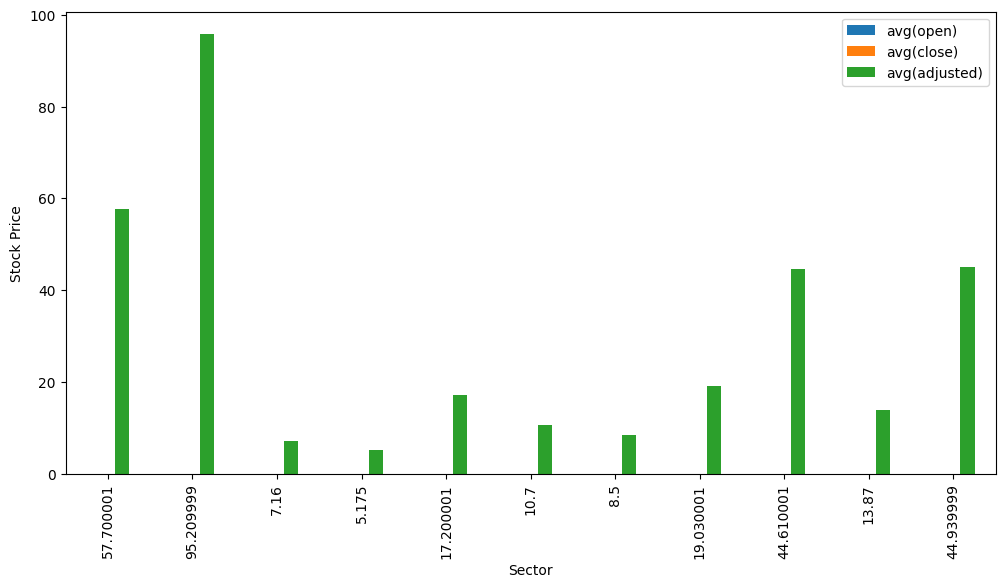

In [73]:
from matplotlib import pyplot as plt
data_schema = [
               StructField('_c0', IntegerType(), nullable=True),
               StructField('open', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('new_volume', IntegerType(), True),
               StructField('date', DateType(), True)
            ]

final_struc = StructType(fields = data_schema)
k = spark.read.csv('/content/sample_data/stocks_price_final.csv', sep=',', header=True, schema=final_struc)

sec_df =  k.select(['sector', 
                       'open', 
                       'close', 
                       'adjusted']
                     )\
                     .groupBy('sector')\
                     .mean()\
                     .toPandas()

ind = list(range(12))
ind.pop(6)

sec_df.iloc[ind ,:].plot(kind='bar', x='sector', y=sec_df.columns.tolist()[1:], 
                         figsize=(12, 6), ylabel='Stock Price', xlabel='Sector')
plt.show()

## **SF_DE_Examples**

In [ ]:
!pip install pyspark==3.0.1 py4j==0.10.9

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

In [ ]:
# Read file
df2 = spark.read.format("csv") \
    .option("mode", "FAILFAST") \
    .option("inferSchema", "true") \
    .option("header","true") \
    .option("path", "data_x/countries_of_the_world.csv") \
    .load()

In [ ]:
df2.show(5)

+---------------+--------------------+----------+--------------+--------------------------+----------------------------+-------------+----------------------------------+------------------+------------+-----------------+----------+---------+---------+-------+---------+---------+-----------+--------+-------+
|        Country|              Region|Population|Area (sq. mi.)|Pop. Density (per sq. mi.)|Coastline (coast/area ratio)|Net migration|Infant mortality (per 1000 births)|GDP ($ per capita)|Literacy (%)|Phones (per 1000)|Arable (%)|Crops (%)|Other (%)|Climate|Birthrate|Deathrate|Agriculture|Industry|Service|
+---------------+--------------------+----------+--------------+--------------------------+----------------------------+-------------+----------------------------------+------------------+------------+-----------------+----------+---------+---------+-------+---------+---------+-----------+--------+-------+
|   Afghanistan |ASIA (EX. NEAR EA...|  31056997|        647500|            

In [ ]:
df2.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Population: integer (nullable = true)
 |-- Area (sq. mi.): integer (nullable = true)
 |-- Pop. Density (per sq. mi.): string (nullable = true)
 |-- Coastline (coast/area ratio): string (nullable = true)
 |-- Net migration: string (nullable = true)
 |-- Infant mortality (per 1000 births): string (nullable = true)
 |-- GDP ($ per capita): integer (nullable = true)
 |-- Literacy (%): string (nullable = true)
 |-- Phones (per 1000): string (nullable = true)
 |-- Arable (%): string (nullable = true)
 |-- Crops (%): string (nullable = true)
 |-- Other (%): string (nullable = true)
 |-- Climate: string (nullable = true)
 |-- Birthrate: string (nullable = true)
 |-- Deathrate: string (nullable = true)
 |-- Agriculture: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Service: string (nullable = true)



In [ ]:
# loading JSON
dfj = sp.read.format("json") \
    .option("mode", "FAILFAST") \
    .option("inferSchema", "true") \
    .option("path", "data/capital.json") \
    .load()
dfj.show(3)

In [ ]:
# цепочка обработки при записи
df.write.format("csv") \
    .mode("overwrite") \
    .option("sep", "\t") \
    .save("data/new.csv")

# Work with DATABASES

In [ ]:
#%spark.pyspark
#setting minimum of parameters. read
df3 = spark.read.format("jdbc") \
    .option("url","jdbc:mysql://10.93.1.9/skillfactory") \
    .option('driver',"com.mysql.jdbc.Driver") \
    .option("dbtable","phones") \
    .option("user","mysql") \
    .option("password","arenadata") \
    .load()

In [ ]:
#write into Hive
jdbcDF.write.format("parquet") \
    .mode('overwrite') \
    .option("compression","gzip") \
    .saveAsTable("sp_phones")

# add partitions explicitly
.option("lowerBound", 712415) \
    .option("upperBound", 81792182) \
    .option("partitionColumn", "CONTRACT_ID") \
    .option("numPartitions", 100) \